In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
data = pd.read_csv("data/mroc/mroc_metars.csv", usecols=["Year", "Month", "Day", "Hour", "Cavok"])
data.head()

,Year,Month,Day,Hour,Cavok
0,2005,1,1,0,0.0
1,2005,1,1,1,0.0
2,2005,1,1,2,0.0
3,2005,1,1,3,0.0
4,2005,1,1,4,0.0


In [45]:
a = np.zeros(12)
means = np.zeros(12)
for i in range(len(a)):
    j = i + 1
    df = data.query(f"Month == {j}")
    means[i] = df["Pressure"].mean()
means

array([30.00736327, 30.00687746, 30.00793286, 29.99743021, 29.99379433,
       29.99403702, 30.0015525 , 29.99542917, 29.99227815, 29.98360039,
       29.9800381 , 29.99743298])

Text(0, 0.5, 'Temperatura de rocío (°)')

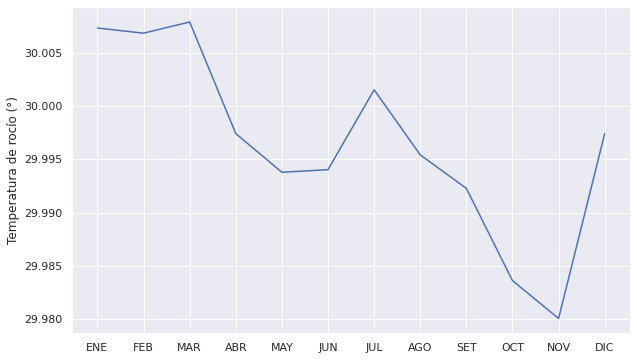

In [46]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
im = sns.lineplot(x=range(12), y=means, ax=ax)
im.set_xticks(list(range(12)))
im.set_xticklabels(["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SET", "OCT", "NOV", "DIC"])
im.set_ylabel("Temperatura de rocío (°)")

In [6]:
list(map(int, arr.tolist()))

[0, 29, 58, 88, 117, 147, 176, 206, 235, 265]

In [17]:
data["Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [26]:
years = data["Year"].unique()
months = np.arange(1, 13)
month_means = np.arange(12)
for m in months:
    m_sum = 0

    for y in years:
        m_df = data.query(f"Year == {y} and Month == {m}")

        for d in range(28):
            d_df = m_df.query(f"Day == {d}")
            day_sum = d_df["Cavok"].sum()

            if day_sum > 12:
                m_sum += 1
            
    month_means[m - 1] = m_sum / len(years)
frecs = 100 * month_means / 28
print(month_means, frecs)

[10 11 10  8  4  3  4  4  4  2  3  8] [35.71428571 39.28571429 35.71428571 28.57142857 14.28571429 10.71428571
 14.28571429 14.28571429 14.28571429  7.14285714 10.71428571 28.57142857]


[Text(0, 0, 'ENE'),
 Text(1, 0, 'FEB'),
 Text(2, 0, 'MAR'),
 Text(3, 0, 'ABR'),
 Text(4, 0, 'MAY'),
 Text(5, 0, 'JUN'),
 Text(6, 0, 'JUL'),
 Text(7, 0, 'AGO'),
 Text(8, 0, 'SET'),
 Text(9, 0, 'OCT'),
 Text(10, 0, 'NOV'),
 Text(11, 0, 'DIC')]

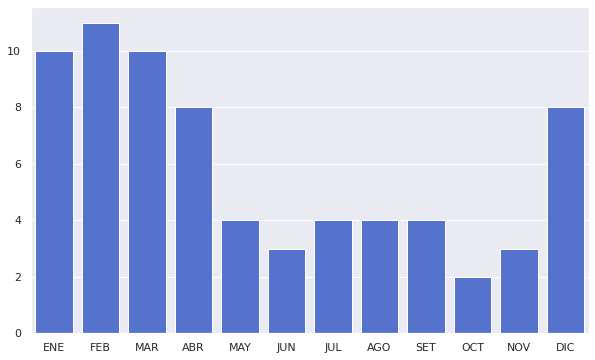

In [22]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
im = sns.barplot(x=months, y=month_means, color="royalblue")
im.set_xticklabels(["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SET", "OCT", "NOV", "DIC"])

In [44]:
arr = np.array([["SH", np.nan, "TS", "SH", np.nan, np.nan], ["SH", np.nan, "TS", "SH", np.nan, np.nan]])
arr = pd.DataFrame(arr)
ocurrences = np.count_nonzero(arr == "SH")
ocurrences

4

In [41]:
val = np.count_nonzero(data["Hour"] != 0)
val

134676